In [26]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [51]:
df_PL = df[df["job_country"] == "Poland"]
df_skills = df_PL.explode("job_skills")
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count" ,ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
912,python,Data Engineer,2240
1160,sql,Data Engineer,2231
1159,sql,Data Analyst,1572
93,azure,Data Engineer,1453
83,aws,Data Engineer,1251
...,...,...,...
1359,webex,Data Engineer,1
1357,watson,Senior Data Analyst,1
1355,watson,Data Analyst,1
1372,wire,Cloud Engineer,1


In [46]:
job_titles = df_skills_count["job_title_short"].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

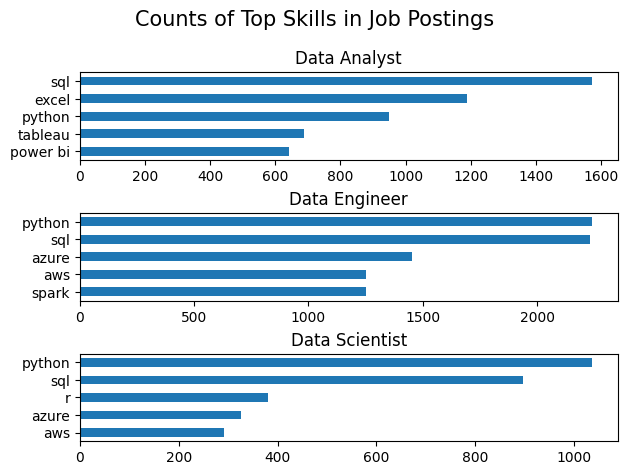

In [68]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)


fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [71]:
df_PL["job_title_short"].value_counts().reset_index(name="job_total")

,job_title_short,job_total
0,Data Engineer,3540
1,Data Analyst,3172
2,Software Engineer,1888
3,Data Scientist,1713
4,Senior Data Engineer,1275
5,Business Analyst,1204
6,Senior Data Analyst,609
7,Senior Data Scientist,531
8,Machine Learning Engineer,468
9,Cloud Engineer,393
